# TensorRT with PyTorch

In [ ]:
!nvidia-smi

Wed May 12 00:25:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Download TensorRT7

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=117bRc2ArDHFy9X0j5Y71pMn7q9Y777fH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=117bRc2ArDHFy9X0j5Y71pMn7q9Y777fH" -O TensorRT-7.2.3.4.Ubuntu-18.04.x86_64-gnu.cuda-11.1.cudnn8.1.tar.gz && rm -rf /tmp/cookies.txt

--2021-05-12 00:27:51--  https://docs.google.com/uc?export=download&confirm=K_d1&id=117bRc2ArDHFy9X0j5Y71pMn7q9Y777fH
Resolving docs.google.com (docs.google.com)... 74.125.195.100, 74.125.195.139, 74.125.195.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-bc-docs.googleusercontent.com/docs/securesc/4mqm7oedsfn6qj87djsooo6flociam01/024c4ojllhmo5i1dfs5ogcks4790o3gf/1620779250000/08464293851449423376/07624238021879239110Z/117bRc2ArDHFy9X0j5Y71pMn7q9Y777fH?e=download [following]
--2021-05-12 00:27:51--  https://doc-0o-bc-docs.googleusercontent.com/docs/securesc/4mqm7oedsfn6qj87djsooo6flociam01/024c4ojllhmo5i1dfs5ogcks4790o3gf/1620779250000/08464293851449423376/07624238021879239110Z/117bRc2ArDHFy9X0j5Y71pMn7q9Y777fH?e=download
Resolving doc-0o-bc-docs.googleusercontent.com (doc-0o-bc-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting

## Install TensorRT7

In [ ]:
!tar -xvzf TensorRT-7.2.3.4.Ubuntu-18.04.x86_64-gnu.cuda-11.1.cudnn8.1.tar.gz
!export TRT_LIBPATH=`pwd`/TensorRT-7.2.3.4

In [ ]:
%cd ./TensorRT-7.2.3.4/python/
!pip install tensorrt-7.2.3.4-cp37-none-linux_x86_64.whl
%cd ..
%cd ..

/content/TensorRT-7.2.3.4/python
Processing ./tensorrt-7.2.3.4-cp37-none-linux_x86_64.whl
/content/TensorRT-7.2.3.4
/content


In [ ]:
%cd ./TensorRT-7.2.3.4/onnx_graphsurgeon/
!pip install onnx_graphsurgeon-0.2.6-py2.py3-none-any.whl
%cd ..
%cd ..

/content/TensorRT-7.2.3.4/onnx_graphsurgeon
Processing ./onnx_graphsurgeon-0.2.6-py2.py3-none-any.whl
     |████████████████████████████████| 12.2MB 7.5MB/s 
/content/TensorRT-7.2.3.4
/content


In [ ]:
!sudo apt-get install libnvinfer7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cuda-nvrtc-11-1 libcublas-11-3
The following NEW packages will be installed:
  cuda-nvrtc-11-1 libcublas-11-3 libnvinfer7
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 276 MB of archives.
After this operation, 975 MB of additional disk space will be used.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  cuda-nvrtc-11-1 11.1.105-1 [11.1 MB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcublas-11-3 11.4.2.10064-1 [134 MB]
Get:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  libnvinfer7 7.2.3-1+cuda11.1 [131 MB]
Fetched 276 MB in 6s (46.2 MB/s)
debconf: unable to

Add path

In [ ]:
!export PATH=$PATH:/usr/local/cuda/bin
!export PATH=$PATH:/content/TensorRT-7.2.3.4/lib
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/lib64
!export LIBRARY_PATH=$LIBRARY_PATH:/usr/local/cuda/lib64
!source /etc/profile

!export LD_LIBRARY_PATH=/content/TensorRT-7.2.3.4/lib:$LD_LIBRARY_PATH
!source ~/.bashrc

In [ ]:
# if neccessary, copy libs into /usr/lib/

# !sudo cp -r /content/TensorRT-7.2.3.4/lib/ /usr/lib/
!sudo cp /usr/local/cuda-11.1/lib64/libnvrtc.so.11.1  /usr/lib/
!sudo cp /content/TensorRT-7.2.3.4/lib/libnvonnxparser.so.7  /usr/lib/
!sudo cp /content/TensorRT-7.2.3.4/lib/libnvparsers.so.7  /usr/lib/
!sudo cp /content/TensorRT-7.2.3.4/lib/libnvinfer_plugin.so.7  /usr/lib/

In [ ]:
!pip3 install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1MB 1.6MB/s eta 0:12:11tcmalloc: large alloc 1147494400 bytes == 0x56019120e000 @  0x7fbf26fe2615 0x560157b52cdc 0x560157c3252a 0x560157b55afd 0x560157c46fed 0x560157bc9988 0x560157bc44ae 0x560157b573ea 0x560157bc97f0 0x560157bc44ae 0x560157b573ea 0x560157bc632a 0x560157c47e36 0x560157bc5853 0x560157c47e36 0x560157bc5853 0x560157c47e36 0x560157bc5853 0x560157c47e36 0x560157cca3e1 0x560157c2a6a9 0x560157b95cc4 0x560157b56559 0x560157bca4f8 0x560157b5730a 0x560157bc53b5 0x560157bc47ad 0x560157b573ea 0x560157bc53b5 0x560157b5730a 0x560157bc53b5
     |█████████████████               | 1055.7MB 1.6MB/s eta 0:09:36tcmalloc: large alloc 1434370048 bytes == 0x5601d5864000 @  0x7fbf26fe2615 0x560157b52cdc 0x560157c3252a 0x560157b55afd 0x560157c46fed 0x560157bc9988 0x560157bc44ae 0x560157b573ea 0x560157bc97f0 0x560157bc44ae 0x560157b573ea 0x560157bc632a 0x560157c47e36 0x560157bc5853 0

In [ ]:
!pip install onnx onnxruntime pycuda

     |████████████████████████████████| 1.7MB 7.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627880 sha256=a3122be86817398d596b365099e883195d906b367cc4c263b8dca6afba3fa12c
  Stored in directory: /root/.cache/pip/wheels/d5/55/64/fd4dddcc5f1c25eebd90b5291c3769101dc978c70165685512
Successfully built pycuda
  Created wheel for pytools: filename=pytools-2021.2.6-py2.py3-none-any.whl size=60643 sha256=3e458d54c9ad0dc7b02f88b57d45684ec9c8cd255820861428d3f2a27587aaae
  Stored in directory: /root/.cache/pip/wheels/8c/a6/65/447b9b4fd1d9bde84ad2fea2431a38f69f3fb573476a98ae03
Successfully built pytools


In [ ]:
# download image
!mkdir ./data
!wget  -O ./data/img0.JPG "https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/siberian-husky-detail.jpg?bust=1535566590&width=630"

--2021-05-12 00:39:12--  https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/siberian-husky-detail.jpg?bust=1535566590&width=630
Resolving d17fnq9dkz9hgj.cloudfront.net (d17fnq9dkz9hgj.cloudfront.net)... 13.224.2.174, 13.224.2.116, 13.224.2.76, ...
Connecting to d17fnq9dkz9hgj.cloudfront.net (d17fnq9dkz9hgj.cloudfront.net)|13.224.2.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24112 (24K) [image/jpeg]
Saving to: ‘./data/img0.JPG’

./data/img0.JPG     100%[===================>]  23.55K  --.-KB/s    in 0.002s  

2021-05-12 00:39:12 (12.9 MB/s) - ‘./data/img0.JPG’ saved [24112/24112]



In [ ]:
# download imagenet class name(need for torch model)
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2021-05-12 00:39:16--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2021-05-12 00:39:16 (57.0 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# load resnet50
from torchvision import models
model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
import cv2
import torch
from albumentations import Resize, Compose
from albumentations.pytorch.transforms import  ToTensor
from albumentations.augmentations.transforms import Normalize
 
def preprocess_image(img_path):
    # transformations for the input data
    transforms = Compose([
        Resize(224, 224, interpolation=cv2.INTER_NEAREST),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensor(),
    ])

     

    # read input image

    input_img = cv2.imread(img_path)

    # do transformations

    input_data = transforms(image=input_img)["image"]
    batch_data = torch.unsqueeze(input_data, 0)

    return batch_data

In [ ]:
input = preprocess_image("./data/img0.JPG").cuda()

In [ ]:
model.eval()
model.cuda()
output = model(input)

In [ ]:
def postprocess(output_data):
    # get class names
    with open("imagenet_classes.txt") as f:
        classes = [line.strip() for line in f.readlines()]
    # calculate human-readable value by softmax
    confidences = torch.nn.functional.softmax(output_data, dim=1)[0] * 100
    # find top predicted classes
    _, indices = torch.sort(output_data, descending=True)
    i = 0
    # print the top classes predicted by the model

    while confidences[indices[0][i]] > 0.5:
        class_idx = indices[0][i]
        print(
            "class:",
            classes[class_idx],
            ", confidence:",
            confidences[class_idx].item(),
            "%, index:",
            class_idx.item(),
        )
        i += 1


postprocess(output)

class: Eskimo dog , confidence: 45.000240325927734 %, index: 248
class: Siberian husky , confidence: 44.0692138671875 %, index: 250
class: malamute , confidence: 7.553358554840088 %, index: 249
class: timber wolf , confidence: 2.859858512878418 %, index: 269


In [ ]:
# convert torch model to .onnx model
ONNX_FILE_PATH = 'resnet50.onnx'
torch.onnx.export(model, input, ONNX_FILE_PATH, input_names=['input'],
                  output_names=['output'], export_params=True)

In [ ]:
# load .onnx model
import onnx
onnx_model = onnx.load(ONNX_FILE_PATH)
onnx.checker.check_model(onnx_model)

In [ ]:
# do inference with .onnx model(onnx default runtime) 
import onnxruntime
import numpy as np

ort_session = onnxruntime.InferenceSession("resnet50.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(input)}
ort_outs = ort_session.run(None, ort_inputs)

# compare ONNX Runtime and PyTorch results
np.testing.assert_allclose(to_numpy(output), ort_outs[0], rtol=1e-03, atol=1e-05)

print("Exported model has been tested with ONNXRuntime, and the result looks good!")

Exported model has been tested with ONNXRuntime, and the result looks good!


In [ ]:
# consstruct tensorRT inference model(engine)

import tensorrt as trt

TRT_LOGGER = trt.Logger(trt.Logger.WARNING)
trt_runtime = trt.Runtime(TRT_LOGGER)
def build_engine(onnx_path, shape = [1,224,224,3]):

   """
   This is the function to create the TensorRT engine
   Args:
      onnx_path : Path to onnx_file. 
      shape : Shape of the input of the ONNX file. 
  """
   with trt.Builder(TRT_LOGGER) as builder, builder.create_network(1) as network, trt.OnnxParser(network, TRT_LOGGER) as parser:
       builder.max_workspace_size = (256 << 20)
       with open(onnx_path, 'rb') as model:
           parser.parse(model.read())
       network.get_input(0).shape = shape
       engine = builder.build_cuda_engine(network)
       return engine

def save_engine(engine, file_name):
   buf = engine.serialize()
   with open(file_name, 'wb') as f:
       f.write(buf)
def load_engine(trt_runtime, engine_path):
   with open(engine_path, 'rb') as f:
       engine_data = f.read()
   engine = trt_runtime.deserialize_cuda_engine(engine_data)
   return engine

In [ ]:
import argparse
from onnx import ModelProto
import tensorrt as trt

engine_name = "resnet50.plan"
onnx_path = "resnet50.onnx"
batch_size = 1 

model = ModelProto()
with open(onnx_path, "rb") as f:
  model.ParseFromString(f.read())

d0 = model.graph.input[0].type.tensor_type.shape.dim[1].dim_value
d1 = model.graph.input[0].type.tensor_type.shape.dim[2].dim_value
d2 = model.graph.input[0].type.tensor_type.shape.dim[3].dim_value
shape = [batch_size , d0, d1 ,d2]
engine = build_engine(onnx_path, shape= shape)
save_engine(engine, engine_name) 

In [ ]:
import tensorrt as trt
import pycuda.driver as cuda
import numpy as np
import pycuda.autoinit

def allocate_buffers(engine, batch_size, data_type):

   """
   This is the function to allocate buffers for input and output in the device
   Args:
      engine : The path to the TensorRT engine. 
      batch_size : The batch size for execution time.
      data_type: The type of the data for input and output, for example trt.float32. 
   
   Output:
      h_input_1: Input in the host.
      d_input_1: Input in the device. 
      h_output_1: Output in the host. 
      d_output_1: Output in the device. 
      stream: CUDA stream.

   """

   # Determine dimensions and create page-locked memory buffers (which won't be swapped to disk) to hold host inputs/outputs.
   h_input_1 = cuda.pagelocked_empty(batch_size * trt.volume(engine.get_binding_shape(0)), dtype=trt.nptype(data_type))
   h_output = cuda.pagelocked_empty(batch_size * trt.volume(engine.get_binding_shape(1)), dtype=trt.nptype(data_type))
   # Allocate device memory for inputs and outputs.
   d_input_1 = cuda.mem_alloc(h_input_1.nbytes)

   d_output = cuda.mem_alloc(h_output.nbytes)
   # Create a stream in which to copy inputs/outputs and run inference.
   stream = cuda.Stream()
   return h_input_1, d_input_1, h_output, d_output, stream

def load_images_to_buffer(pics, pagelocked_buffer):
   preprocessed = np.asarray(pics).ravel()
   np.copyto(pagelocked_buffer, preprocessed)

def do_inference(engine, pics_1, h_input_1, d_input_1, h_output, d_output, stream, batch_size):
   """
   This is the function to run the inference
   Args:
      engine : Path to the TensorRT engine 
      pics_1 : Input images to the model.  
      h_input_1: Input in the host         
      d_input_1: Input in the device 
      h_output_1: Output in the host 
      d_output_1: Output in the device 
      stream: CUDA stream
      batch_size : Batch size for execution time
      height: Height of the output image
      width: Width of the output image
   
   Output:
      The list of output images

   """

   load_images_to_buffer(pics_1, h_input_1)

   with engine.create_execution_context() as context:
       # Transfer input data to the GPU.
       cuda.memcpy_htod_async(d_input_1, h_input_1, stream)

       # Run inference.

       context.profiler = trt.Profiler()
       context.execute(batch_size=1, bindings=[int(d_input_1), int(d_output)])

       # Transfer predictions back from the GPU.
       cuda.memcpy_dtoh_async(h_output, d_output, stream)
       # Synchronize the stream
       stream.synchronize()
       # Return the host output.
       out = h_output.reshape((batch_size,-1))
       return out 

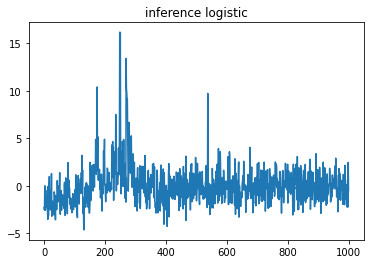

In [ ]:
# do inference with .onnx using TensorRT runtime
import tensorrt as trt
from PIL import Image
import skimage.transform
import matplotlib.pyplot as plt

def rescale_image(image, output_shape, order=1):
   image = skimage.transform.resize(image, output_shape,
               order=order, preserve_range=True, mode='reflect')
   return image

input_file_path = './data/img0.JPG'
onnx_file = "resnet50.onnx"
serialized_plan_fp32 = "./resnet50.plan"

im = preprocess_image("./data/img0.JPG").cpu()

engine = load_engine(trt_runtime, serialized_plan_fp32)
h_input, d_input, h_output, d_output, stream = allocate_buffers(engine, 1, trt.float32)
out = do_inference(engine, im, h_input, d_input, h_output, d_output, stream, 1)

plt.title('inference logistic')
plt.plot(out[0])